In [135]:
#Load the libraryss
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [136]:
loan_df = pd.read_csv('loan.csv')

C:\Users\AAKASH\anaconda3\envs\datascience\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [137]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [138]:
loan_columns =  loan_df.columns


In [139]:
loan_df.shape


(39717, 111)

## As we can see that there are many column in the dataset which are having lot of missing values, so let's drop the columns with more than 60% missing values

In [140]:
total = loan_df.isnull().sum().sort_values(ascending=False)
percent = (loan_df.isnull().sum()/loan_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[:55]

,Total,Percent
verification_status_joint,39717,1.000000
annual_inc_joint,39717,1.000000
mo_sin_old_rev_tl_op,39717,1.000000
mo_sin_old_il_acct,39717,1.000000
bc_util,39717,1.000000
bc_open_to_buy,39717,1.000000
avg_cur_bal,39717,1.000000
acc_open_past_24mths,39717,1.000000
inq_last_12m,39717,1.000000
total_cu_tl,39717,1.000000


In [141]:
missing_data[55:]

,Total,Percent
mths_since_last_record,36931,0.929854
mths_since_last_delinq,25682,0.646625
desc,12940,0.325805
emp_title,2459,0.061913
emp_length,1075,0.027066
pub_rec_bankruptcies,697,0.017549
last_pymnt_d,71,0.001788
collections_12_mths_ex_med,56,0.001410
chargeoff_within_12_mths,56,0.001410
revol_util,50,0.001259


## As we can see all the columns above column "mths_since_last_delinq" have equal to or more than 64% missing values, so let's delete columns with more than 60% missing values for now, since there is no way to compute these values or make sense of them

In [142]:
loan_df = loan_df.drop((missing_data[missing_data['Percent'] > .6]).index,axis =1)

In [143]:
loan_df.shape

(39717, 54)

### Now removing the columns that are the customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval(As discussed in the live upgrad class)

In [144]:
loan_df = loan_df.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],1)

C:\Users\AAKASH\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [145]:
loan_df.shape

(39717, 33)

In [146]:
print(loan_df.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

## Removing the columns with only zero values or policy_codes

In [147]:
loan_df = loan_df.drop(['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths','delinq_amnt','tax_liens' ],1)

C:\Users\AAKASH\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [148]:
loan_df.shape

(39717, 27)

In [149]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'initial_list_status',
       'pub_rec_bankruptcies'],
      dtype='object')

In [150]:
loan_df['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [151]:
loan_df['url'].value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785630     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785626     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: url, Length: 39717, dtype: int64

In [152]:
loan_df['desc'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              210
Debt Consolidation                                                                                                                                                                                                                                                                                                                                    

In [153]:
loan_df['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

## Removing the above 4 columns because they have a single value or text data which cannot be used by us in EDA

In [154]:
loan_df = loan_df.drop(['pymnt_plan', 'url', 'desc','initial_list_status'],1)

C:\Users\AAKASH\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [155]:
loan_df.shape

(39717, 23)

In [156]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

## We will have to remove rows which are for current loan status, because for the guy who is paying the loan there is no way to say if it is a good or bad loan, so don't use that current data in the analysis. Considering only fully paid and charged off loans

In [157]:
loan_df = loan_df[loan_df['loan_status'] != "Current"]

In [158]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

## We can see that our data is imbalanced in favour of Fully paid, but that was expected and for now I will not do much about it since we are not doing predictive modelling

In [159]:
loan_df.shape

(38577, 23)

In [160]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'pub_rec_bankruptcies'],
      dtype='object')

## Making derived columns

In [161]:
loan_df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [162]:
loan_df['months'] = loan_df['term'].str.rstrip('months')
del loan_df['term']


In [163]:
loan_df['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [164]:
loan_df['interest_percentage'] = loan_df['int_rate'].str.rstrip('%')
del loan_df['int_rate']


In [165]:
loan_df['interest_percentage'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: interest_percentage, Length: 370, dtype: int64

In [166]:
loan_df.count()

id                      38577
member_id               38577
loan_amnt               38577
funded_amnt             38577
funded_amnt_inv         38577
installment             38577
grade                   38577
sub_grade               38577
emp_title               36191
emp_length              37544
home_ownership          38577
annual_inc              38577
verification_status     38577
issue_d                 38577
loan_status             38577
purpose                 38577
title                   38566
zip_code                38577
addr_state              38577
dti                     38577
pub_rec_bankruptcies    37880
months                  38577
interest_percentage     38577
dtype: int64

## As we can see above only 4 columns have very few missing values. So we can now start with our further analysis

In [167]:
loan_df.shape

(38577, 23)

In [168]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'months', 'interest_percentage'],
      dtype='object')

In [169]:
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

## Univariate Analysis


## This is the distribution for DTI Debt-To-Income Ratio

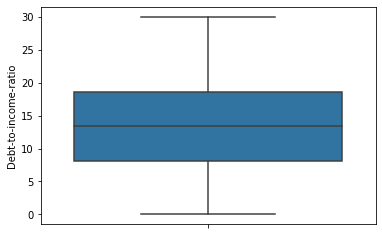

In [170]:
sns.boxplot( y=loan_df["dti"] )
plt.ylabel('Debt-to-income-ratio')
plt.show()


In [171]:
loan_df["dti"].mean()

13.272727013505456

### Inference -  The debt-to-income ratio varies from 0 to 30 having mean of 13%

## Loan amount

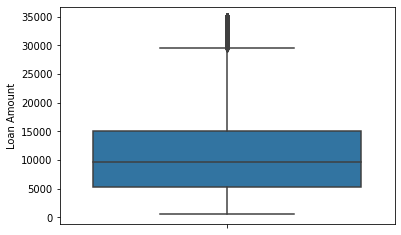

In [172]:
sns.boxplot( y=loan_df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

In [173]:
loan_df["loan_amnt"].mean()

11047.02542966016

### Inference - Loan amount varies from 0 to 35,000 and mean of 11,047 USD

## Number of months the loan is structured for

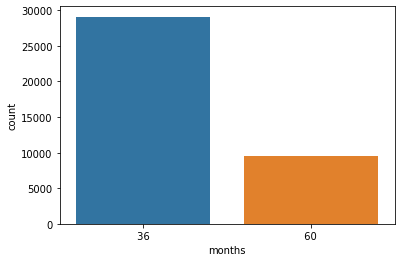

In [175]:
sns.countplot(x= loan_df["months"])
plt.show()

### Inference - Most people prefer to take loan for 36 months

## Status of the loan

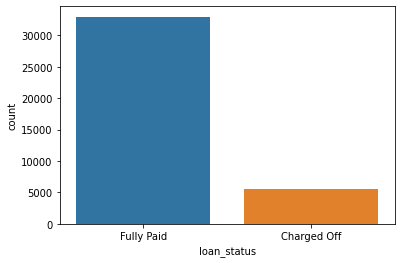

In [177]:
sns.countplot(x= loan_df["loan_status"])
plt.show()

### Inference - Most of the loans are Fully Paid and We have a class imbalance here.



## Interest percentage of the loans

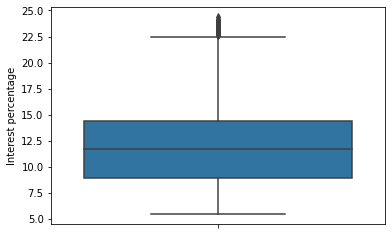

In [178]:
loan_df["interest_percentage"] = pd.to_numeric(loan_df["interest_percentage"])

sns.boxplot( y=loan_df["interest_percentage"] )
plt.ylabel('Interest percentage')
plt.show()

### Inference - Most of the  loans of around 11% and they range between 6% and 23% 

## Grade of loans

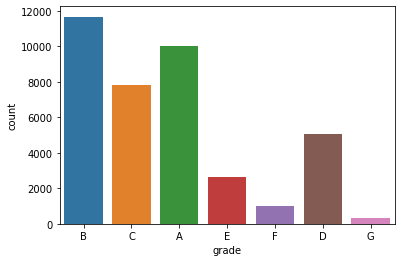

In [179]:
sns.countplot(x= loan_df['grade'])
plt.show()

### Inference - Most loans are of A, B and C grade

## Subgrades of loan

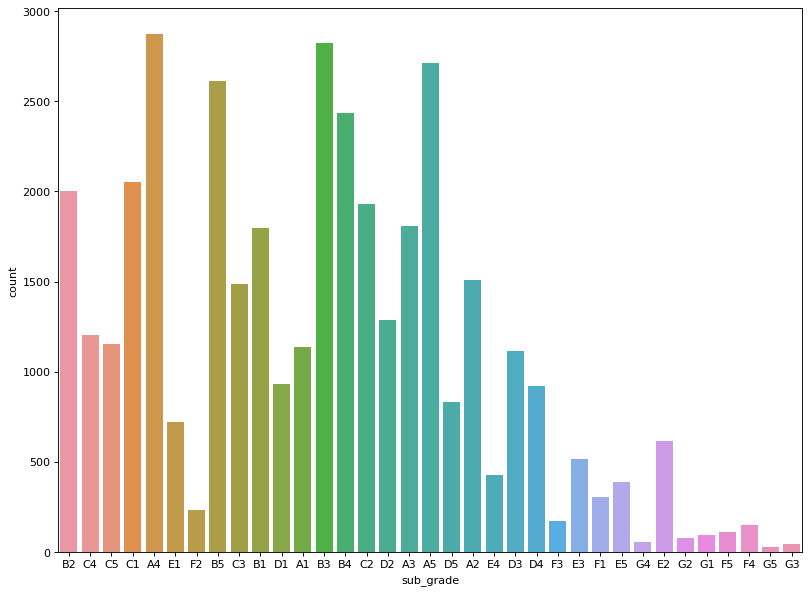

In [180]:
from matplotlib.pyplot import figure

figure(figsize=(12, 9), dpi=80)
sns.countplot(x= loan_df['sub_grade'])
plt.show()


### Inference: Most loans are of grade of A and B and then it belongs to C & D. So most loans are high graded loans



# Income of customers taking loans

In [181]:
loan_df.shape

(38577, 23)

In [182]:
(sum(loan_df['annual_inc'] > 200000)/len(loan_df))*100

1.4775643518158488

### Only 1.4% of the people have income more than 200,000 USD

### I think it is good idea to remove people which are having income of more than 200,000 USD since they are few and can be considered outliers

In [183]:
loan_df = loan_df[loan_df['annual_inc'] < 200000]

In [184]:
loan_df.shape

(37888, 23)

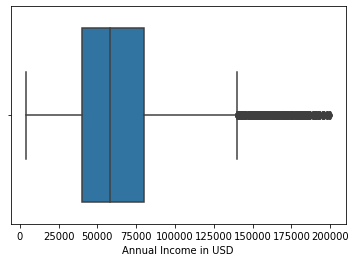

In [185]:
sns.boxplot(x=loan_df["annual_inc"])
plt.xlabel('Annual Income in USD')
plt.show()

In [186]:
loan_df["annual_inc"].mean(), loan_df["annual_inc"].median()

(64157.788295238606, 57855.0)

### Inference - The mean income is around 64k and the median is 57K, after removing outliers

## Pupose of loan

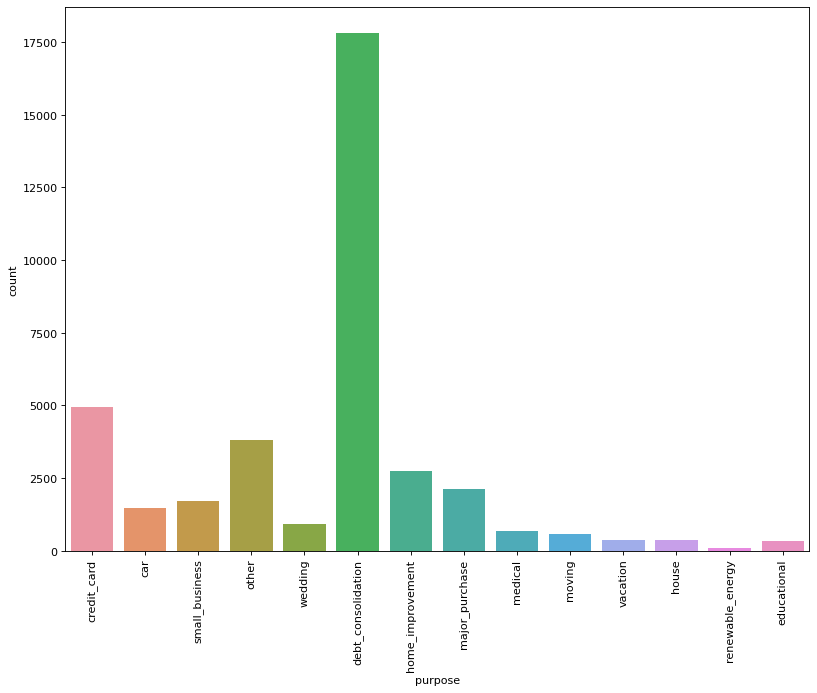

In [187]:
figure(figsize=(12, 9), dpi=80)
sns.countplot(x= loan_df['purpose'])
plt.xticks(rotation=90)
plt.show()


### Inference - Most of the loans are debt_consolidation

## Employment duration of the person taking loan

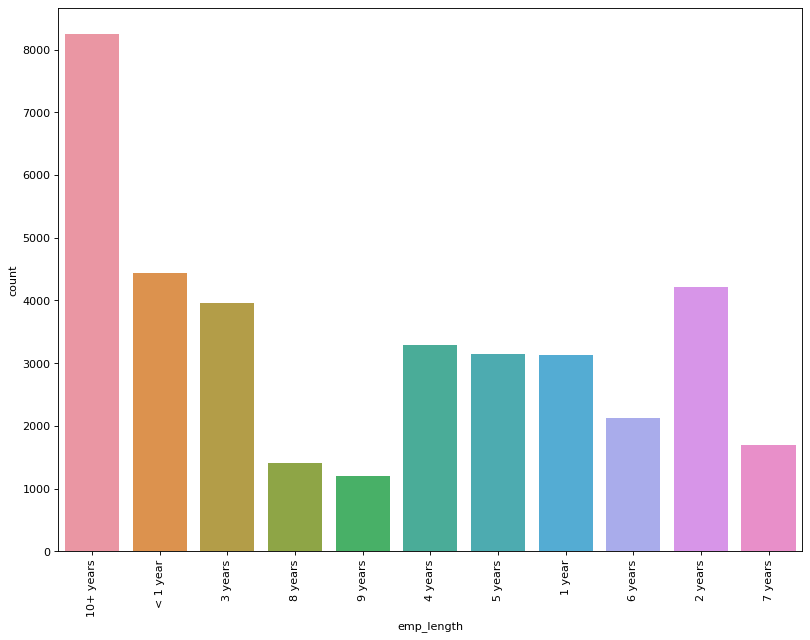

In [188]:
figure(figsize=(12, 9), dpi=80)
sns.countplot(x= loan_df['emp_length'])
plt.xticks(rotation=90)
plt.show()

### Inference - Many of the loans are taken by people with more than 10 years of experience

## Home ownership of customes with loans

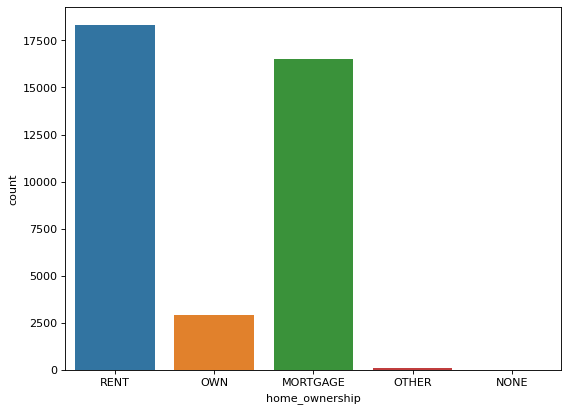

In [189]:
figure(figsize=(8, 6), dpi=80)
sns.countplot(x= loan_df['home_ownership'])
plt.show()

### Inference - Most people with loans live in rented or mortgaged house

## Verification status of customers with loans

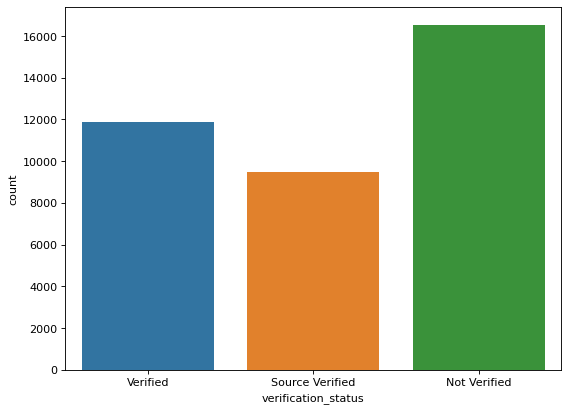

In [191]:
figure(figsize=(8, 6), dpi=80)
sns.countplot(x= loan_df['verification_status'])
plt.show()


### Inference - Many people whose status was not verified were given loans

## Purpose of loan

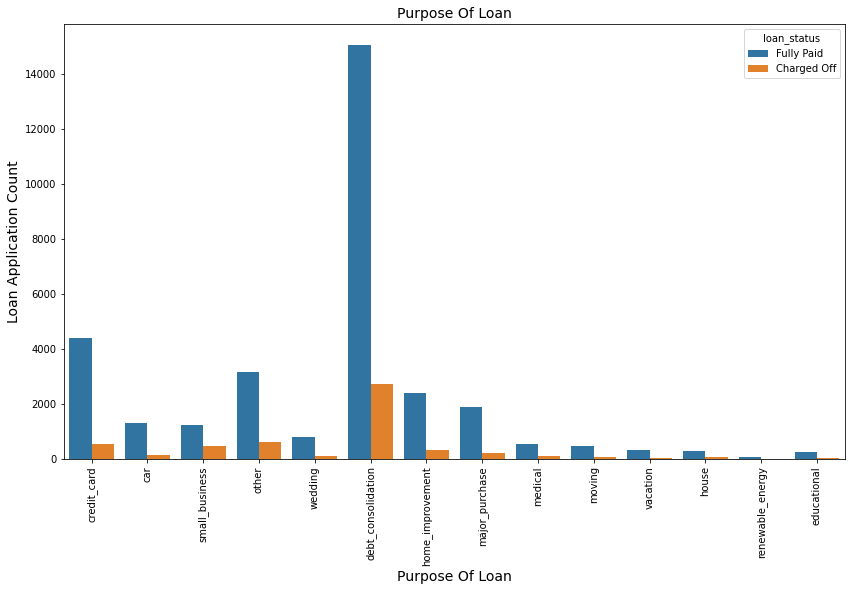

In [208]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="purpose",data=loan_df,hue='loan_status')
ax.set_title('Purpose Of Loan',fontsize=14)
ax.set_xlabel('Purpose Of Loan',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)   
plt.xticks(rotation=90)
plt.show()

### Inference - Many loan are taken for debt consolidation and lot of them are becoming bad loans

## Home ownership of customers with loan

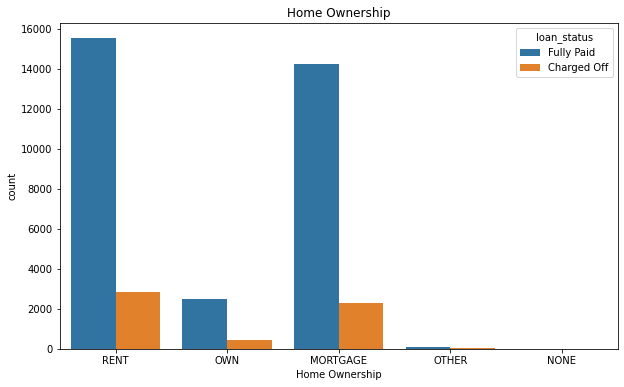

In [209]:
plt.figure(figsize=(10,6))

ax = sns.countplot(x="home_ownership",data=loan_df, hue='loan_status')
ax.set_title('Home Ownership')
ax.set_xlabel('Home Ownership')

plt.show()


### Inference - Most people who took loan are in rented home or mortgaged home

# Bivariate anlysis

## Creating derived columns which can be used in this analysis

In [210]:
# dti into bins
loan_df['dti_cat'] = pd.cut(loan_df['dti'], [0, 8, 14, 19,30 ], labels=['0-8', '8-14', '14-19', '19+'])

# Intrest rates in bins
loan_df['int_rate_cat'] = pd.cut(loan_df['interest_percentage'], [0, 8, 11, 14, 25], labels=['0-8', '8-11', '11-14', '14 +'])

# loan amounts in bins 
loan_df['loan_amnt_cat'] = pd.cut(loan_df['loan_amnt'], [0, 10000, 20000, 30000,40000 ], labels=['0-10000', '10000-20000', '20000-30000', '30000 +'])

# Annual incomes into bins
loan_df['annual_inc_cat'] = pd.cut(loan_df['annual_inc'], [0, 20000, 40000, 60000, 80000,200000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])


## Grades vs Charged off ratio

In [211]:
loan_grp = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
loan_grp['Total'] = loan_grp['Charged Off'] +  loan_grp['Fully Paid'] 
loan_grp['Charged_off_Proportion'] = loan_grp['Charged Off'] / loan_grp['Total']

## We are making charged off proportion as the key indicator as that explains the proportion of defaults, which is most important for us

In [212]:
loan_grp

loan_status,grade,Charged Off,Fully Paid,Total,Charged_off_Proportion
0,A,600,9326,9926,0.060447
1,B,1407,10069,11476,0.122604
2,C,1338,6356,7694,0.173902
3,D,1106,3879,4985,0.221866
4,E,699,1885,2584,0.270511
5,F,309,629,938,0.329424
6,G,97,188,285,0.340351


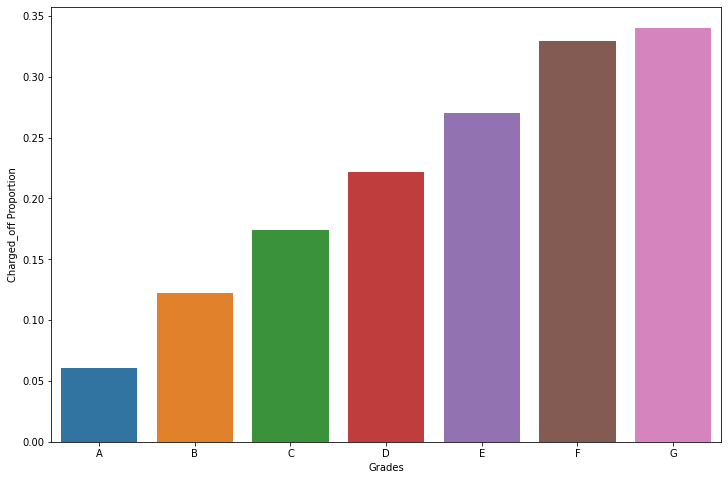

In [213]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1=sns.barplot(x='grade', y='Charged_off_Proportion', data=loan_grp)
ax1.set_xlabel('Grades')
ax1.set_ylabel('Charged_off Proportion')
plt.show()

### Inference - As we can see Grade A has the least defaults

## Annual Income vs Chargedoff Proportion

In [214]:
income_grp_loan = loan_df.groupby(['annual_inc_cat', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
income_grp_loan

loan_status,annual_inc_cat,Charged Off,Fully Paid
0,0-20000,237,943
1,20000-40000,1514,7004
2,40000-60000,1729,9534
3,60000-80000,1024,6597
4,80000 +,1052,8254


In [215]:
income_grp_loan['Total'] = income_grp_loan['Charged Off']  + income_grp_loan['Fully Paid'] 
income_grp_loan['Charged_off_Proportion'] = income_grp_loan['Charged Off'] / income_grp_loan['Total']


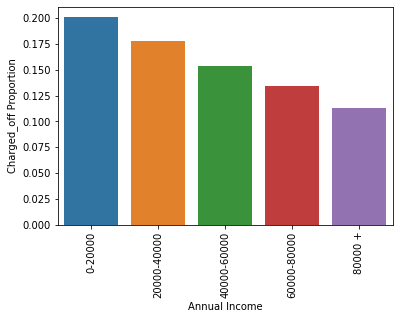

In [216]:
ax1=sns.barplot(x='annual_inc_cat', y='Charged_off_Proportion', data=income_grp_loan)
ax1.set_ylabel('Charged_off Proportion')
ax1.set_xlabel('Annual Income')
plt.xticks(rotation=90)

plt.show()

### Inference -  We can see that as income goes higher the percentage of charged off loan decreases

## Purpose of loan vs charged off proportion

In [113]:
purpose_and_default = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_and_default['Total'] = purpose_and_default['Charged Off'] + purpose_and_default['Fully Paid'] 
purpose_and_default['Charged_off_Proportion'] = purpose_and_default['Charged Off'] / purpose_and_default['Total']



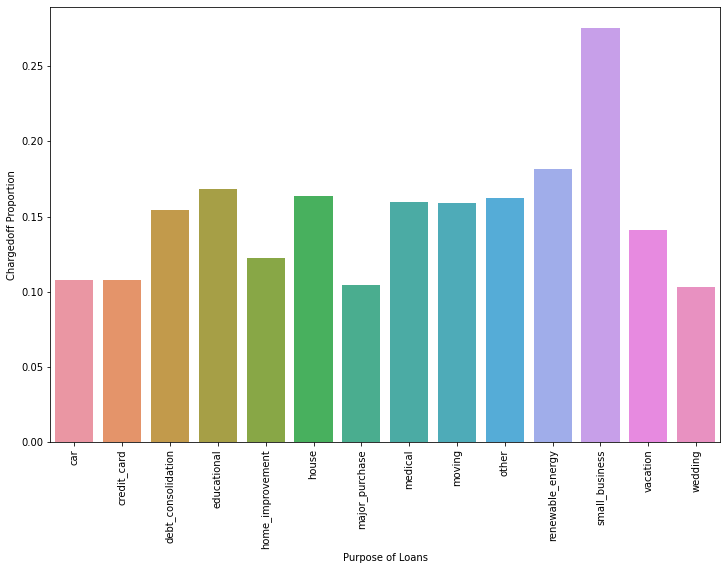

In [114]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1=sns.barplot(x='purpose', y='Charged_off_Proportion', data=purpose_and_default)
ax1.set_xlabel('Purpose of Loans')
ax1.set_ylabel('Chargedoff Proportion')
plt.xticks(rotation=90)

plt.show()

### Inference - 
### Small business have the highest rate of default 
### Car, credit card and Wedding loans have the lowest rate of default

## Debt to income vs Charged off proportion

In [217]:
dti_and_default = loan_df.groupby(['dti_cat', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_and_default['Total'] = dti_and_default['Charged Off'] + dti_and_default['Fully Paid'] 
dti_and_default['Charged_off_Proportion'] = dti_and_default['Charged Off'] / dti_and_default['Total']


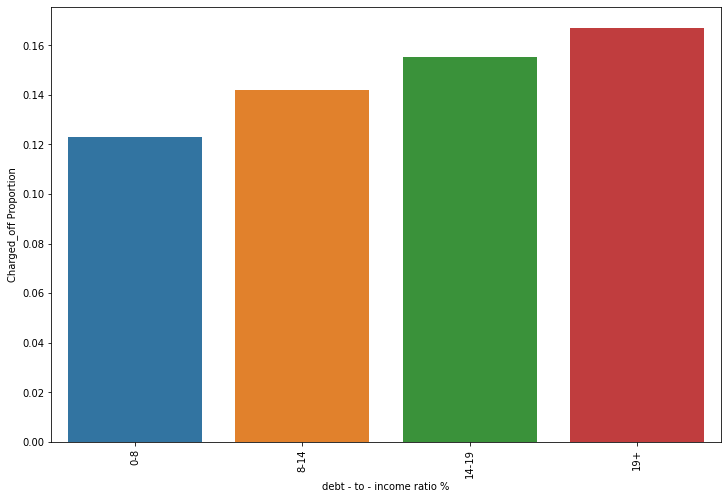

In [219]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1=sns.barplot(x='dti_cat', y='Charged_off_Proportion', data=dti_and_default)
ax1.set_xlabel('debt - to - income ratio %')
ax1.set_ylabel('Charged_off Proportion')
plt.xticks(rotation=90)

plt.show()

### Inference - DTI of over 19 has the highest rate of default and as people are more in debt as compared to the income, the chances of default increases

## Grade vs Charged off proportion for small business

In [220]:
loan_df_small = loan_df[loan_df['purpose'] == 'small_business']

In [221]:
loan_df_small.shape

(1702, 27)

In [222]:
small_and_grp = loan_df_small.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
small_and_grp['Total'] = small_and_grp['Charged Off'] + small_and_grp['Fully Paid'] 
small_and_grp['Charged_off_Proportion'] = small_and_grp['Charged Off'] / small_and_grp['Total']


In [223]:
small_and_grp

loan_status,grade,Charged Off,Fully Paid,Total,Charged_off_Proportion
0,A,40,301,341,0.117302
1,B,120,322,442,0.271493
2,C,95,232,327,0.290520
3,D,93,187,280,0.332143
4,E,65,114,179,0.363128
5,F,35,51,86,0.406977
6,G,21,26,47,0.446809


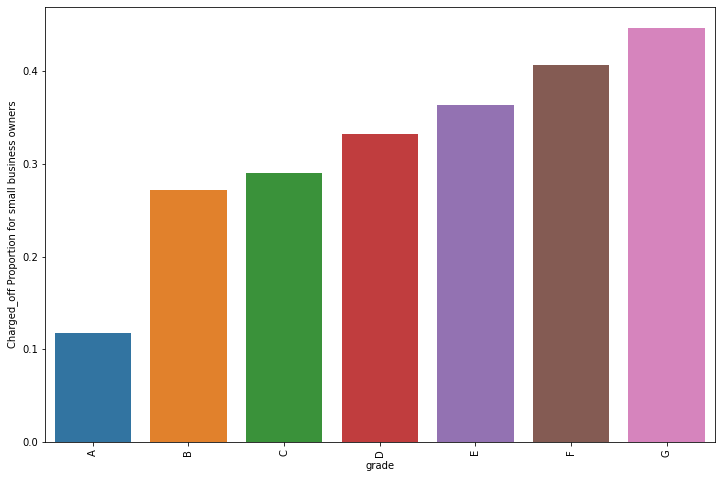

In [224]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1=sns.barplot(x='grade', y='Charged_off_Proportion', data=small_and_grp)
ax1.set_xlabel('grade')
ax1.set_ylabel('Charged_off Proportion for small business owners')
plt.xticks(rotation=90)

plt.show()

### Since small business owners had the maximum default rate, so looking down futher into that data.We can see that grade D, E, F and G have 30%- 45% default rate
### Inference - Small business owners with D,E,F,G have the highest default rate